In [ ]:
import pandas as pd

df = pd.read_excel('polifarmacia_lisboa_2022_excel.xlsx')
df['prescribed_drugs'] = df.prescribed_drugs.apply(lambda drugs: drugs[1:-1].split(','))

,id,year,municipality,district,nuts3,nuts2,nuts1,population,med_specialty,spec_group,spec_major,gender,age_group,prescribed_drugs,count_prescribed_drugs,count_presc_details
0,5452227,2022,Amadora,Lisboa,Ãrea Metropolitana de Lisboa,Lisboa,Continente,9992,Psiquiatria,Psiquiatria,Psiquiatria,M,50-59,"[Duloxetina, Mirtazapina, Sertralina]",3,1


In [ ]:
drugs_df = pd.read_csv('drug_class_completo.txt')

,drug,type,subtype,note
0,Mianserina,antidepressivo,antagonistas alfa-2,antagonistas dos adrenoreceptores alfa-2


In [ ]:
df.head(5)

,id,year,municipality,district,nuts3,nuts2,nuts1,population,med_specialty,spec_group,spec_major,gender,age_group,prescribed_drugs,count_prescribed_drugs,count_presc_details
0,5452227,2022,Amadora,Lisboa,Ãrea Metropolitana de Lisboa,Lisboa,Continente,9992,Psiquiatria,Psiquiatria,Psiquiatria,M,50-59,"[Duloxetina, Mirtazapina, Sertralina]",3,1
1,5418167,2022,Alenquer,Lisboa,Oeste,Centro,Continente,1037,Cardiologia,Cardiologia,Outras Especialidades,M,80+,"[Escitalopram, Mirtazapina]",2,1
2,5418168,2022,Alenquer,Lisboa,Oeste,Centro,Continente,1037,Cardiologia,Cardiologia,Outras Especialidades,M,80+,"[Mexazolam, Sertralina, Venlafaxina]",3,1
3,5418169,2022,Alenquer,Lisboa,Oeste,Centro,Continente,1037,Cirurgia Geral,Cirurgia,Outras Especialidades,M,80+,"[Alprazolam, Fluoxetina]",2,1
4,5418170,2022,Alenquer,Lisboa,Oeste,Centro,Continente,1037,Cirurgia Geral,Cirurgia,Outras Especialidades,M,80+,"[Alprazolam, Venlafaxina]",2,1


In [ ]:
def is_contentious(drugs): 
    #returns a tuple, whether the presciption is contentious or not, and why it is contentious

    types_count = {}
    subtypes_count = {}
    why = ''
    
    for drug in drugs:

        drug_info = drugs_df[ drugs_df.drug == drug ]
        
        #count how many times each class appears
        if len(drug_info['type'].values) > 0:
            drug_type = drug_info['type'].values[0]
            if drug_type in types_count:
                types_count[drug_type] = types_count[drug_type] + 1
                why = drug_type
            else:
                types_count[drug_type] = 1
                why = drug_type
        
        #count how many times each subclass appears
        if len(drug_info['subtype'].values) > 0 and drug_info['subtype'].values[0] != '':
            drug_subtype = drug_info['subtype'].values[0]
            if drug_subtype in subtypes_count:
                subtypes_count[drug_subtype] = subtypes_count[drug_subtype] + 1
                why = drug_type
            else:
                subtypes_count[drug_subtype] = 1
                why = drug_type

    #contentious by class if the same class appears 3 times
    for t in types_count:
        if types_count[t] >= 3:
            return (True, "Class", why)
    
    #contentious by subclass if the same subclass appears 2 times
    for t in subtypes_count:
        if subtypes_count[t] == 2:
            return (True, "Subclass", why)

    return (False, None, None)

df['is_contentious'] = df['prescribed_drugs'].apply(lambda drugs: is_contentious(drugs)[0])
df['contention_type'] = df['prescribed_drugs'].apply(lambda drugs: is_contentious(drugs)[1])
df['contention_why'] = df['prescribed_drugs'].apply(lambda drugs: is_contentious(drugs)[2])

In [ ]:
contentious_rows = df[ df.is_contentious == True ]
contentious_rows

contentious_antidepressivos = contentious_rows[contentious_rows.contention_why == 'antidepressivo']
contentious_antipsicoticos = contentious_rows[contentious_rows.contention_why == 'antipsicótico']
contentious_benzodiazepinas = contentious_rows[contentious_rows.contention_why == 'benzodiazepina']


In [ ]:
print('Número de receitas', len(df))
print('Número de receitas de Mulheres', len(df[ df.gender == 'F' ]))
print('Número de receitas de Homens', len(df[ df.gender == 'M' ]))
print('Número de receitas, Medicina Geral E Familiar', len(df[ df.med_specialty == 'Medicina Geral E Familiar' ]))
print('Número de receitas, Psiquiatria', len(df[ df.med_specialty == 'Psiquiatria' ]))
print('Número de receitas, Neurologia', len(df[ df.med_specialty == 'Neurologia' ]))
print('')
print('Número de receitas contenciosas', len(contentious_rows))
print('Número de receitas contenciosas de Mulheres', len(contentious_rows[ contentious_rows.gender == 'F' ]))
print('Número de receitas contenciosas de Homens', len(contentious_rows[ contentious_rows.gender == 'M' ]))
print('Número de receitas contenciosas, Medicina Geral E Familiar', len(contentious_rows[ contentious_rows.med_specialty == 'Medicina Geral E Familiar' ]))
print('Número de receitas contenciosas, Psiquiatria', len(contentious_rows[ contentious_rows.med_specialty == 'Psiquiatria' ]))
print('Número de receitas contenciosas, Neurologia', len(contentious_rows[ contentious_rows.med_specialty == 'Neurologia' ]))
print('')
print('Número de receitas contenciosas antidepressivos', len(contentious_antidepressivos))
print('Número de receitas contenciosas antidepressivos de Mulheres', len(contentious_antidepressivos[ contentious_antidepressivos.gender == 'F' ]))
print('Número de receitas contenciosas antidepressivos de Homens', len(contentious_antidepressivos[ contentious_antidepressivos.gender == 'M' ]))
print('Número de receitas contenciosas antidepressivos, Medicina Geral E Familiar', len(contentious_antidepressivos[ contentious_antidepressivos.med_specialty == 'Medicina Geral E Familiar' ]))
print('Número de receitas contenciosas antidepressivos, Psiquiatria', len(contentious_antidepressivos[ contentious_antidepressivos.med_specialty == 'Psiquiatria' ]))
print('Número de receitas contenciosas antidepressivos, Neurologia', len(contentious_antidepressivos[ contentious_antidepressivos.med_specialty == 'Neurologia' ]))
print('')
print('Número de receitas contenciosas antipsicóticos', len(contentious_antipsicoticos))
print('Número de receitas contenciosas antipsicóticos de Mulheres', len(contentious_antipsicoticos[ contentious_rows.gender == 'F' ]))
print('Número de receitas contenciosas antipsicóticos de Homens', len(contentious_antipsicoticos[ contentious_antipsicoticos.gender == 'M' ]))
print('Número de receitas contenciosas antipsicóticos, Medicina Geral E Familiar', len(contentious_antipsicoticos[ contentious_antipsicoticos.med_specialty == 'Medicina Geral E Familiar' ]))
print('Número de receitas contenciosas antipsicóticos, Psiquiatria', len(contentious_antipsicoticos[ contentious_antipsicoticos.med_specialty == 'Psiquiatria' ]))
print('Número de receitas contenciosas antipsicóticos, Neurologia', len(contentious_antipsicoticos[ contentious_antipsicoticos.med_specialty == 'Neurologia' ]))
print('')
print('Número de receitas contenciosas benzodiazepinas', len(contentious_benzodiazepinas))
print('Número de receitas contenciosas benzodiazepinas de Mulheres', len(contentious_benzodiazepinas[ contentious_benzodiazepinas.gender == 'F' ]))
print('Número de receitas contenciosas benzodiazepinas de Homens', len(contentious_benzodiazepinas[ contentious_benzodiazepinas.gender == 'M' ]))
print('Número de receitas contenciosas benzodiazepinas, Medicina Geral E Familiar', len(contentious_benzodiazepinas[ contentious_benzodiazepinas.med_specialty == 'Medicina Geral E Familiar' ]))
print('Número de receitas contenciosas benzodiazepinas, Psiquiatria', len(contentious_benzodiazepinas[ contentious_benzodiazepinas.med_specialty == 'Psiquiatria' ]))
print('Número de receitas contenciosas benzodiazepinas, Neurologia', len(contentious_benzodiazepinas[ contentious_benzodiazepinas.med_specialty == 'Neurologia' ]))

Número de receitas 172381
Número de receitas de Mulheres 114789
Número de receitas de Homens 57592
Número de receitas, Medicina Geral E Familiar 52591
Número de receitas, Psiquiatria 57923
Número de receitas, Neurologia 11357

Número de receitas contenciosas 28325
Número de receitas contenciosas de Mulheres 18389
Número de receitas contenciosas de Homens 9936
Número de receitas contenciosas, Medicina Geral E Familiar 8249
Número de receitas contenciosas, Psiquiatria 12158
Número de receitas contenciosas, Neurologia 1379

Número de receitas contenciosas antidepressivos 14048
Número de receitas contenciosas antidepressivos de Mulheres 10073
Número de receitas contenciosas antidepressivos de Homens 3975
Número de receitas contenciosas antidepressivos, Medicina Geral E Familiar 4056
Número de receitas contenciosas antidepressivos, Psiquiatria 6501
Número de receitas contenciosas antidepressivos, Neurologia 860

Número de receitas contenciosas antipsicóticos 10177
Número de receitas contenc

C:\Users\catar\AppData\Local\Temp\ipykernel_6744\2370320447.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Número de receitas contenciosas antipsicóticos de Mulheres', len(contentious_antipsicoticos[ contentious_rows.gender == 'F' ]))


In [ ]:
print('Número de receitas , 80+', len(df[ df.age_group == '80+' ]))
print('Número de receitas, 70-79', len(df[ df.age_group == '70-79' ]))
print('Número de receitas, 60-69', len(df[ df.age_group == '60-69' ]))
print('Número de receitas, 50-59', len(df[ df.age_group == '50-59' ]))
print('Número de receitas, 40-49', len(df[ df.age_group == '40-49' ]))
print('Número de receitas, 30-39', len(df[ df.age_group == '30-39' ]))
print('Número de receitas, 18-29', len(df[ df.age_group == '18-29' ]))
print('Número de receitas, 0-17', len(df[ df.age_group == '0-17' ]))
print('')
print('Número de receitas contenciosas, 80+', len(contentious_rows[ contentious_rows.age_group == '80+' ]))
print('Número de receitas contenciosas, 70-79', len(contentious_rows[ contentious_rows.age_group == '70-79' ]))
print('Número de receitas contenciosas, 60-69', len(contentious_rows[ contentious_rows.age_group == '60-69' ]))
print('Número de receitas contenciosas, 50-59', len(contentious_rows[ contentious_rows.age_group == '50-59' ]))
print('Número de receitas contenciosas, 40-49', len(contentious_rows[ contentious_rows.age_group == '40-49' ]))
print('Número de receitas contenciosas, 30-39', len(contentious_rows[ contentious_rows.age_group == '30-39' ]))
print('Número de receitas contenciosas, 18-29', len(contentious_rows[ contentious_rows.age_group == '18-29' ]))
print('Número de receitas contenciosas, 0-17', len(contentious_rows[ contentious_rows.age_group == '0-17' ]))
print('')
print('Número de receitas contenciosas antidepressivos, 80+', len(contentious_antidepressivos[ contentious_antidepressivos.age_group == '80+' ]))
print('Número de receitas contenciosas antidepressivos, 70-79', len(contentious_antidepressivos[ contentious_antidepressivos.age_group == '70-79' ]))
print('Número de receitas contenciosas antidepressivos, 60-69', len(contentious_antidepressivos[ contentious_antidepressivos.age_group == '60-69' ]))
print('Número de receitas contenciosas antidepressivos, 50-59', len(contentious_antidepressivos[ contentious_antidepressivos.age_group == '50-59' ]))
print('Número de receitas contenciosas antidepressivos, 40-49', len(contentious_antidepressivos[ contentious_antidepressivos.age_group == '40-49' ]))
print('Número de receitas contenciosas antidepressivos, 30-39', len(contentious_antidepressivos[ contentious_antidepressivos.age_group == '30-39' ]))
print('Número de receitas contenciosas antidepressivos, 18-29', len(contentious_antidepressivos[ contentious_antidepressivos.age_group == '18-29' ]))
print('Número de receitas contenciosas antidepressivos, 0-17', len(contentious_antidepressivos[ contentious_antidepressivos.age_group == '0-17' ]))
print('')
print('Número de receitas contenciosas antipsicóticos, 80+', len(contentious_antipsicoticos[ contentious_antipsicoticos.age_group == '80+' ]))
print('Número de receitas contenciosas antipsicóticos, 70-79', len(contentious_antipsicoticos[ contentious_antipsicoticos.age_group == '70-79' ]))
print('Número de receitas contenciosas antipsicóticos, 60-69', len(contentious_antipsicoticos[ contentious_antipsicoticos.age_group == '60-69' ]))
print('Número de receita contenciosas antipsicóticoss, 50-59', len(contentious_antipsicoticos[ contentious_antipsicoticos.age_group == '50-59' ]))
print('Número de receitas contenciosas antipsicóticos, 40-49', len(contentious_antipsicoticos[ contentious_antipsicoticos.age_group == '40-49' ]))
print('Número de receitas contenciosas antipsicóticos, 30-39', len(contentious_antipsicoticos[ contentious_antipsicoticos.age_group == '30-39' ]))
print('Número de receitas contenciosas antipsicóticos, 18-29', len(contentious_antipsicoticos[ contentious_antipsicoticos.age_group == '18-29' ]))
print('Número de receitas contenciosas antipsicóticos, 0-17', len(contentious_antipsicoticos[ contentious_antipsicoticos.age_group == '0-17' ]))
print('')
print('Número de receitas contenciosas benzodiazepinas, 80+', len(contentious_benzodiazepinas[ contentious_benzodiazepinas.age_group == '80+' ]))
print('Número de receitas contenciosas benzodiazepinas, 70-79', len(contentious_benzodiazepinas[ contentious_benzodiazepinas.age_group == '70-79' ]))
print('Número de receitas contenciosas benzodiazepinas, 60-69', len(contentious_benzodiazepinas[ contentious_benzodiazepinas.age_group == '60-69' ]))
print('Número de receitas contenciosas benzodiazepinas, 50-59', len(contentious_benzodiazepinas[ contentious_benzodiazepinas.age_group == '50-59' ]))
print('Número de receitas contenciosas benzodiazepinas, 40-49', len(contentious_benzodiazepinas[ contentious_benzodiazepinas.age_group == '40-49' ]))
print('Número de receitas contenciosas benzodiazepinas, 30-39', len(contentious_benzodiazepinas[ contentious_benzodiazepinas.age_group == '30-39' ]))
print('Número de receitas contenciosas benzodiazepinas, 18-29', len(contentious_benzodiazepinas[ contentious_benzodiazepinas.age_group == '18-29' ]))
print('Número de receitas contenciosas benzodiazepinas, 0-17', len(contentious_benzodiazepinas[ contentious_benzodiazepinas.age_group == '0-17' ]))

Número de receitas , 80+ 28470
Número de receitas, 70-79 32512
Número de receitas, 60-69 31645
Número de receitas, 50-59 29960
Número de receitas, 40-49 23073
Número de receitas, 30-39 12304
Número de receitas, 18-29 10581
Número de receitas, 0-17 3836

Número de receitas contenciosas, 80+ 4654
Número de receitas contenciosas, 70-79 5147
Número de receitas contenciosas, 60-69 5070
Número de receitas contenciosas, 50-59 5090
Número de receitas contenciosas, 40-49 3786
Número de receitas contenciosas, 30-39 1842
Número de receitas contenciosas, 18-29 1785
Número de receitas contenciosas, 0-17 951

Número de receitas contenciosas antidepressivos, 80+ 2298
Número de receitas contenciosas antidepressivos, 70-79 2823
Número de receitas contenciosas antidepressivos, 60-69 2660
Número de receitas contenciosas antidepressivos, 50-59 2596
Número de receitas contenciosas antidepressivos, 40-49 1903
Número de receitas contenciosas antidepressivos, 30-39 806
Número de receitas contenciosas antidepr

In [ ]:
from itertools import combinations
#creates an objet with the names of the analysed drugs and a list to put the analysed pairs
combinations_data = {'drug1': [],
                     'drug2': []}
seen_pairs = {}

for _, row in contentious_rows[['prescribed_drugs', 'contention_type']].iterrows():
    contention_type, prescribed_drugs = row.contention_type, row.prescribed_drugs
    
    for drug1, drug2 in combinations(prescribed_drugs, 2):
        combo = '+'.join( sorted([drug1, drug2]) ) #combinations for each contentious prescription

        if combo not in seen_pairs: #if the pair isn't in 'seen_pair' put it there
            drug1_info = drugs_df[ drugs_df['drug'] == drug1 ]
            drug2_info = drugs_df[ drugs_df['drug'] == drug2 ]
            combinations_data['drug1'].append(drug1)
            combinations_data['drug2'].append(drug2)
        
            #if drug1 and drug2 are of the same class, count them
            if contention_type == 'Class' and len(drug1_info.type.values) > 0 and len(drug2_info.type.values) > 0:
                if drug1_info.type.values[0] == drug2_info.type.values[0]:
                    seen_pairs[combo] = 1
            #or if drug1 and drug2 are of the same subclass, count them
            elif len(drug1_info.subtype.values) > 0 and len(drug2_info.subtype.values) > 0:
                if drug1_info.subtype.values[0] == drug2_info.subtype.values[0]:
                    seen_pairs[combo] = 1
        
        else: # if the pair was already in 'seen_pairs' just add 1 to the count
            seen_pairs[combo] = seen_pairs[combo] + 1

combinations_df = pd.DataFrame(data={ 'drugs': seen_pairs.keys(), 'count': seen_pairs.values() })
combinations_df['drug1'] = combinations_df['drugs'].apply(lambda d: d.split('+')[0])
combinations_df['drug2'] = combinations_df['drugs'].apply(lambda d: d.split('+')[1])
combinations_df.drop('drugs', axis=1)
combinations_df = combinations_df.sort_values(by='count', ascending=False)
combinations_df.head(21) # new data frame with all the contentious cases, countedd and ordered

,drugs,count,drug1,drug2
20,Quetiapina+Risperidona,2579,Quetiapina,Risperidona
15,Olanzapina+Quetiapina,2274,Olanzapina,Quetiapina
41,Mirtazapina+Trazodona,2065,Mirtazapina,Trazodona
3,Alprazolam+Lorazepam,1860,Alprazolam,Lorazepam
32,Amissulprida+Quetiapina,1504,Amissulprida,Quetiapina
6,Trazodona+Venlafaxina,1474,Trazodona,Venlafaxina
22,Aripiprazol+Quetiapina,1243,Aripiprazol,Quetiapina
60,Sertralina+Trazodona,1095,Sertralina,Trazodona
42,Mirtazapina+Venlafaxina,1044,Mirtazapina,Venlafaxina
19,Olanzapina+Risperidona,874,Olanzapina,Risperidona


In [ ]:
#combinations by class

combinations_antidepressivo = combinations_df[combinations_df['drug2'].isin(drugs_df[drugs_df['type'] == 'antidepressivo'] \
                                                                            ['drug'])].copy()
combinations_antipsicotico = combinations_df[combinations_df['drug2'].isin(drugs_df[drugs_df['type'] == 'antipsicótico'] \
                                                                           ['drug'])].copy()
combinations_benzodiazepina = combinations_df[combinations_df['drug2'].isin(drugs_df[drugs_df['type'] == 'benzodiazepina'] \
                                                                            ['drug'])].copy()
combinations_antidepressivo.head(20)

,drugs,count,drug1,drug2
41,Mirtazapina+Trazodona,2065,Mirtazapina,Trazodona
6,Trazodona+Venlafaxina,1474,Trazodona,Venlafaxina
60,Sertralina+Trazodona,1095,Sertralina,Trazodona
42,Mirtazapina+Venlafaxina,1044,Mirtazapina,Venlafaxina
40,Escitalopram+Trazodona,857,Escitalopram,Trazodona
2,Mirtazapina+Sertralina,758,Mirtazapina,Sertralina
62,Fluoxetina+Trazodona,660,Fluoxetina,Trazodona
37,Duloxetina+Trazodona,516,Duloxetina,Trazodona
39,Escitalopram+Mirtazapina,492,Escitalopram,Mirtazapina
4,Amitriptilina+Trazodona,486,Amitriptilina,Trazodona


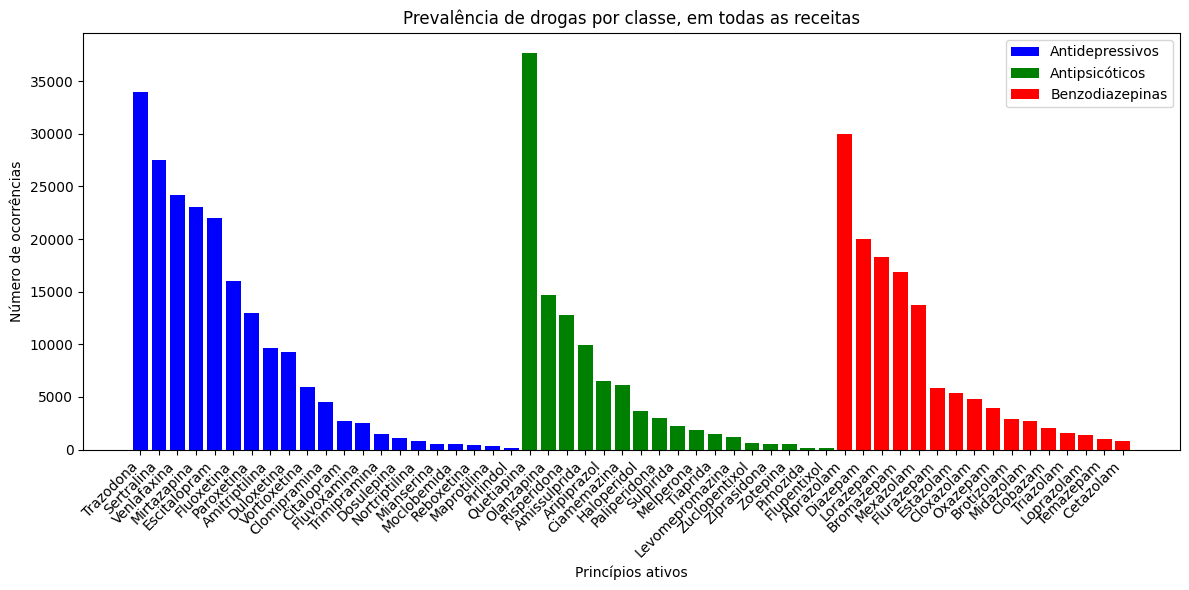

In [ ]:
#drugs prevalence in all prescriptions
flat_drugs = [drug for drugs_list in df['prescribed_drugs'] for drug in drugs_list]
drug_counts = pd.Series(flat_drugs).value_counts()
prevalencia_df = pd.DataFrame({'drug':drug_counts.index, 'count':drug_counts.values})
prevalencia_df = prevalencia_df.sort_values(by='count', ascending=False)
#pprevalence by class
prevalencia_antidepressivos = prevalencia_df[prevalencia_df['drug'].isin(drugs_df[drugs_df['type'] == 'antidepressivo'] \
                                                                         ['drug'])].copy()
prevalencia_antipsicoticos = prevalencia_df[prevalencia_df['drug'].isin(drugs_df[drugs_df['type'] == 'antipsicótico'] \
                                                                        ['drug'])].copy()
prevalencia_benzodiazepinas = prevalencia_df[prevalencia_df['drug'].isin(drugs_df[drugs_df['type'] == 'benzodiazepina'] \
                                                                         ['drug'])].copy()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(prevalencia_antidepressivos['drug'], prevalencia_antidepressivos['count'], color='blue', label='Antidepressivos')
ax.bar(prevalencia_antipsicoticos['drug'], prevalencia_antipsicoticos['count'], color='green', label='Antipsicóticos')
ax.bar(prevalencia_benzodiazepinas['drug'], prevalencia_benzodiazepinas['count'], color='red', label='Benzodiazepinas')
ax.set_xlabel('Princípios ativos')
ax.set_ylabel('Número de ocorrências')
ax.set_title('Prevalência de drogas por classe, em todas as receitas')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('prevalencia_normal.png', format='png', bbox_inches='tight')
plt.show()

In [ ]:
#print(prevalencia_df.head(21))
#print(prevalencia_contencioso_df.head(21))
print(prevalencia_df['count'].sum())
print(prevalencia_contencioso_df['count'].sum())
print(prevalencia_antidepressivos['count'].sum())
print(prevalencia_antipsicoticos['count'].sum())
print(prevalencia_benzodiazepinas['count'].sum())
print(prevalencia_antidepressivos_contencioso['count'].sum())
print(prevalencia_antipsicoticos_contencioso['count'].sum())
print(prevalencia_benzodiazepinas_contencioso['count'].sum())


438949
90620
199577
103220
131330
33811
32159
24250


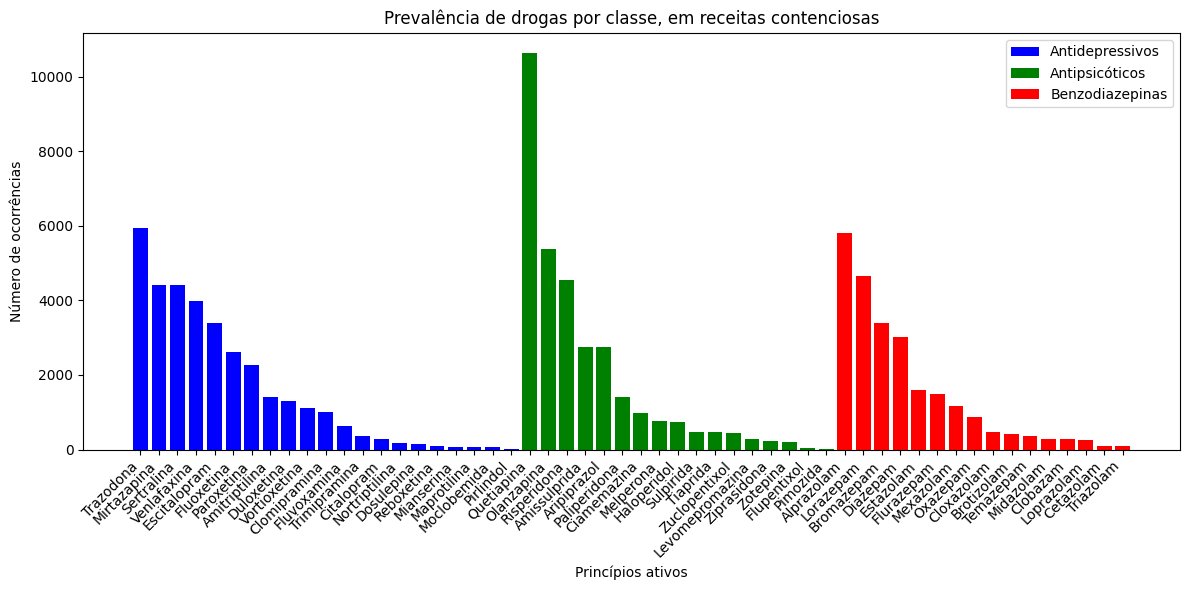

In [ ]:
#drug prevalence in contentious prescriptions
flat_drugs = [drug for drugs_list in contentious_rows['prescribed_drugs'] for drug in drugs_list]
drug_counts = pd.Series(flat_drugs).value_counts()
prevalencia_contencioso_df = pd.DataFrame({'drug':drug_counts.index, 'count':drug_counts.values})
prevalencia_contencioso_df = prevalencia_contencioso_df.sort_values(by='count', ascending=False)

prevalencia_antidepressivos_contencioso = prevalencia_contencioso_df[prevalencia_contencioso_df['drug'] \
                                                        .isin(drugs_df[drugs_df['type'] == 'antidepressivo']['drug'])].copy()
prevalencia_antipsicoticos_contencioso = prevalencia_contencioso_df[prevalencia_contencioso_df['drug'] \
                                                        .isin(drugs_df[drugs_df['type'] == 'antipsicótico']['drug'])].copy()
prevalencia_benzodiazepinas_contencioso = prevalencia_contencioso_df[prevalencia_contencioso_df['drug'] \
                                                        .isin(drugs_df[drugs_df['type'] == 'benzodiazepina']['drug'])].copy()

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(prevalencia_antidepressivos_contencioso['drug'], prevalencia_antidepressivos_contencioso['count'], color='blue', label='Antidepressivos')
ax.bar(prevalencia_antipsicoticos_contencioso['drug'], prevalencia_antipsicoticos_contencioso['count'], color='green', label='Antipsicóticos')
ax.bar(prevalencia_benzodiazepinas_contencioso['drug'], prevalencia_benzodiazepinas_contencioso['count'], color='red', label='Benzodiazepinas')
ax.set_xlabel('Princípios ativos')
ax.set_ylabel('Número de ocorrências')
ax.set_title('Prevalência de drogas por classe, em receitas contenciosas')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('prevalencia_contencioso.png', format='png', bbox_inches='tight')
plt.show()

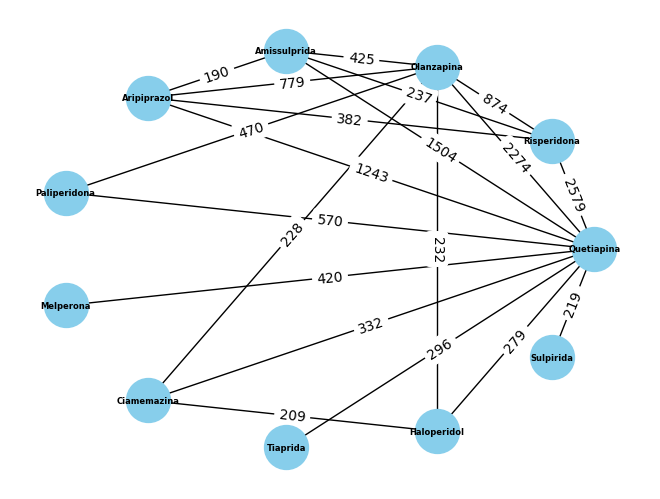

In [ ]:
#weighted graph for antidepressants

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for _, row in combinations_antipsicotico.head(20).iterrows():
    G.add_edge(row['drug1'], row['drug2'], weight=row['count'])

pos = nx.circular_layout(G)

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', font_size=6, arrows=False)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.savefig('grafo__psic_circular20.png', format='png', bbox_inches='tight')
plt.show()

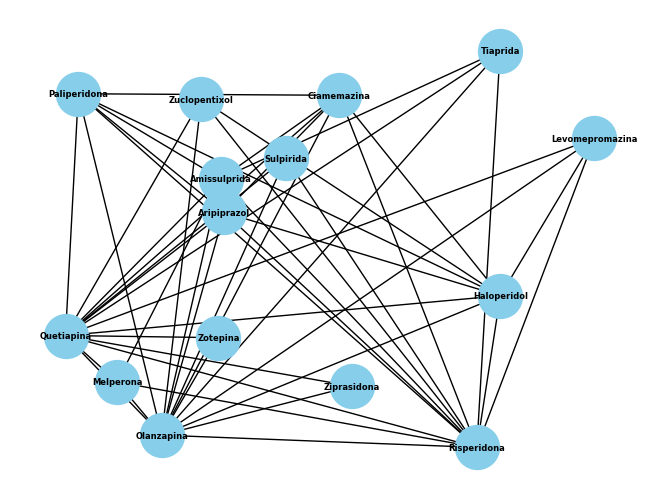

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap

G = nx.DiGraph()

for _, row in combinations_antipsicotico.head(50).iterrows():
    G.add_edge(row['drug1'], row['drug2'], weight=row['count'])

seed_value = 21  
pos = nx.random_layout(G, seed=seed_value)

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', font_size=6, arrows=False)

edge_labels = nx.get_edge_attributes(G, 'weight')

plt.savefig('grafo_psico_sem_escala50.png', format='png', bbox_inches='tight')
plt.show()

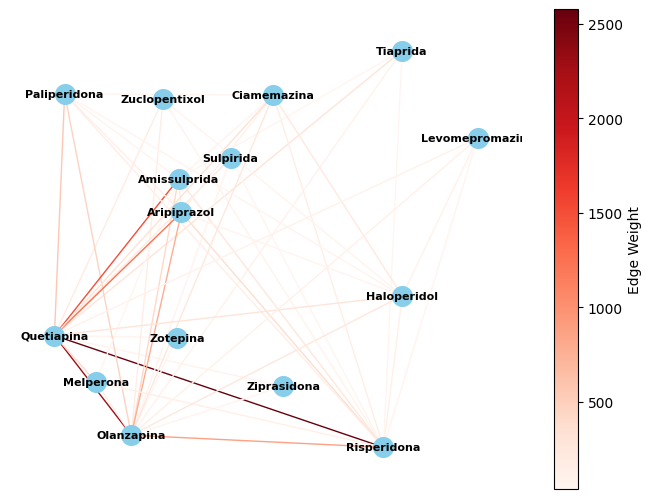

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import LinearSegmentedColormap

edge_weights = [weight[2] for weight in G.edges(data='weight')]

min_weight, max_weight = min(edge_weights), max(edge_weights)
normalized_weights = [(weight - min_weight) / (max_weight - min_weight) for weight in edge_weights]

cmap = plt.cm.Reds
edge_colors = [cmap(weight) for weight in normalized_weights]

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color='skyblue', font_size=8,
        edge_color=edge_colors, arrows=False)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_weight, vmax=max_weight))
sm.set_array([])  # You can add your colorbar settings here
cbar = plt.colorbar(sm, ax=plt.gca(), label='Edge Weight')

plt.savefig('grafo_psico_com_escala_red50.png', format='png', bbox_inches='tight')
plt.show()

In [ ]:
print("Edge Weights:",list(combinations_antidepressivo['count']))

# Plot a histogram of edge weights
plt.hist(combinations_antidepressivo['count'], bins=20, edgecolor='black')
plt.title('Distribuição de ocorrências de pares de combinações')
plt.xlabel('valor da contagem')
plt.ylabel('números de pares de drogas')
plt.show()